# Predict Wine Quality by Chemical Properties

### Import libraries/packages and data

In [1]:
# Import libraries & packages needed for analysis project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Import and inspect the data set:

In [2]:
# Import the wine data set chosen for this project
wine = pd.read_csv("data/winequality-red-uci.csv", sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape

(1599, 12)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Data set visual inspection:
From the above views we can see that there are no null fields anywhere in the dataset. All our data has numeric values. All the features are float type and the label is int type. It appears our data set is high quality and very tidy, requiring no further cleaning prior to beginning analysis.

### Prep for improved machine learning:
Let's determine the best way to handle the "quality" label for our machine learning algorithm to best prepare it for predicting quality ratings of wines.

In [6]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
lo = 53 + 10
seven = 199
eight = 18
loper = lo/1599*100
sevper = seven/1599*100
eigper = eight/1599*100
print("Lowest quality ratings of 3 & 4 only have {} samples, just {:.1f}% of the data set.".format(lo,loper))
print("Rating 7 only has {} samples, just {:.1f}% of the data set.".format(seven,sevper))
print("Rating 8 only has {} samples, just {:.1f}% of the data set.".format(eight,eigper))

Lowest quality ratings of 3 & 4 only have 63 samples, just 3.9% of the data set.
Rating 7 only has 199 samples, just 12.4% of the data set.
Rating 8 only has 18 samples, just 1.1% of the data set.


From our value counts, it's clear that most of the samples are in the mid-range of the quality rating (5 & 6). Since this lack of balanced values can make it harder for our algorithm to accurately learn how to rate the wines in those quality values with such limited sample sizes, let's combine the high quality ratings into a boolean value of 1 for any quality >=7, and 0 for everything else. This will give us a group of about 13.5% for the "high quality" category.

In [9]:
wine['best'] = wine['quality'].where(wine['quality'] > 6, 0)
wine['best'].unique()

array([0, 7, 8])

In [10]:
wine['best'] = wine['best'].where(wine['best'] < 6, 1)
wine['best'].unique()

array([0, 1])

In [11]:
wine.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best
1466,7.3,0.480,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7,1
1085,6.8,0.480,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6,5,0
1125,8.8,0.240,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,7,1
1058,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6,7,1
253,7.7,0.775,0.42,1.9,0.092,8.0,86.0,0.99590,3.23,0.59,9.5,5,0
261,7.0,0.975,0.04,2.0,0.087,12.0,67.0,0.99565,3.35,0.60,9.4,4,0
1325,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6,0
738,9.0,0.460,0.23,2.8,0.092,28.0,104.0,0.99830,3.10,0.56,9.2,5,0
497,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5,0
1116,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6,0


In [12]:
wine.drop(['quality'], axis=1, inplace=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  best                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Build Machine Learning Algorithm
Now that our data set is prepped, we can create, fit, train, and test our Random Forest Classifier.

In [14]:
# Separate the "best" label column from the rest of the dataset
X = wine.drop('best', axis=1)
y = wine['best']

In [16]:
# Split our features and label (target) into training and testing sets
# The 'stratify' ensures that we get more balanced sets between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
# Create and fit our Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Get predictions on our test set
rfc_pred = rfc.predict(X_test)

In [24]:
# Check accuracy score first
rfc_acc = accuracy_score(y_test, rfc_pred)
print('Our initial accuracy score is {:.1f}%'.format(rfc_acc*100))

Our initial accuracy score is 93.5%


And accuracy of 93.5% is a pretty great start to a model we haven't tweaked at all with hyperparameters. Let's look at this model a bit more to understand it.

## Confusion Matrix

In [61]:
# View the confusion matrix
cfmatrix = confusion_matrix(y_test, rfc_pred)
cfmatrix

array([[341,   5],
       [ 21,  33]])

In [62]:
# View a normalized confusion matrix
cfmatrix_norm = confusion_matrix(y_test, rfc_pred, normalize='true')
cfmatrix_norm

array([[0.98554913, 0.01445087],
       [0.38888889, 0.61111111]])

We can immediately see from the above matrix that we had 5 'False Negatives' and 21 'False Positives'. Let's look at this with a visual chart.

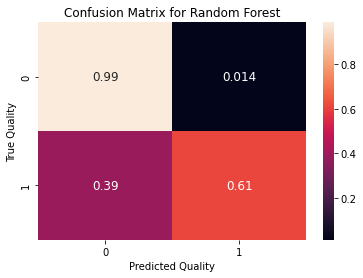

In [66]:
cfmatrix = cfmatrix.astype('float') / cfmatrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cfmatrix, annot=True, annot_kws={'size':12})
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

## F-1 Score

In [38]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       346
           1       0.87      0.61      0.72        54

    accuracy                           0.94       400
   macro avg       0.91      0.80      0.84       400
weighted avg       0.93      0.94      0.93       400



The above classification report shows us we have a great F-1 Score of 96% of accurately determining wine that is NOT of good quality, but only 72% correct of wine that IS good quality. This does put us on the "safer side" of not accidentally choosing low quality wines, but we may miss out on some good quality wines as the trade-off.

## Feature Importance
Let's take a look at which features our Random Forest model considered the most important, which had the most impact on the wine data set.

In [40]:
rfc.feature_importances_

array([0.07429859, 0.10804914, 0.08823175, 0.06869369, 0.0778761 ,
       0.06249092, 0.07600845, 0.08909349, 0.06423657, 0.11153305,
       0.17948825])

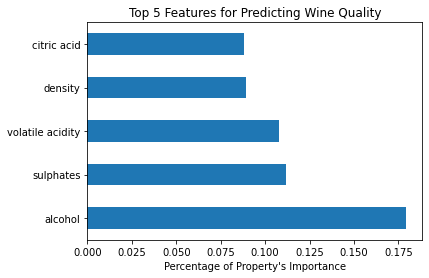

In [54]:
feat_imp = pd.Series(rfc.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.title('Top 5 Features for Predicting Wine Quality')
plt.xlabel("Percentage of Property's Importance");

Above we can see our 5 features (chemical properties) that our model weighted as "most important" when it came to predicting the quality of each wine.